The purpose of this file is to plot the data of the IPCC assessed scenarios found on this link 

https://previous.iiasa.ac.at/web/home/research/researchPrograms/Energy/IPCC_AR5_Database.html

Date 21 July 2022

In [57]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


In [58]:
#read the dataframe 
ipcc = pd.read_csv(r'C:\Users\M.Amer\Desktop\GECF_Corona\workshops and interviews and participations\IAEE August 2022\ar5_public_version102_compare_compare_20150629-130000.csv')

In [59]:
ipcc.head()

,MODEL,SCENARIO,REGION,VARIABLE,UNIT,2005,2010,2015,2020,2025,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CH4,Mt CH4/yr,135.655230,144.634615,NaN,106.936635,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2,Mt CO2/yr,10540.737490,13160.180070,NaN,11899.377250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2|Fossil Fuels and Industry,Mt CO2/yr,9126.178808,11910.091200,NaN,10748.325240,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|CO2|Land Use,Mt CO2/yr,1414.558679,1250.088870,NaN,1151.052014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIM-Enduse 12.1,EMF27-450-Conv,ASIA,Emissions|F-Gases,Mt CO2-equiv/yr,151.222433,197.782463,NaN,251.557129,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
list(ipcc['VARIABLE'].unique())

['Emissions|CH4',
 'Emissions|CO2',
 'Emissions|CO2|Fossil Fuels and Industry',
 'Emissions|CO2|Land Use',
 'Emissions|F-Gases',
 'Emissions|N2O',
 'Energy Service|Transportation|Freight',
 'Energy Service|Transportation|Passenger',
 'Final Energy',
 'Final Energy|Industry',
 'Final Energy|Residential and Commercial|Electricity',
 'Final Energy|Transportation',
 'GDP|MER',
 'Population',
 'Primary Energy',
 'Emissions|CO2|Carbon Capture and Storage',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Demand',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Demand|Industry',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Demand|Residential and Commercial',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Demand|Transportation',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Supply',
 'Emissions|CO2|Fossil Fuels and Industry|Energy Supply|Electricity',
 'Emissions|Kyoto Gases',
 'Final Energy|Electricity',
 'Final Energy|Gases',
 'Final Energy|Geothermal',
 'Final Energy|Heat',
 'Fina

In [61]:
ipcc_unique_variables = ipcc['VARIABLE'].value_counts().to_frame()

In [62]:
ipcc_unique_variables = ipcc_unique_variables.reset_index()

In [63]:
#get the variables that has primary energy in them


ipcc_unique_variables[ipcc_unique_variables["index"].str.contains("Primary Energy")]

,index,VARIABLE
1,Primary Energy,5794
16,Primary Energy|Nuclear,1165
17,Primary Energy|Non-Biomass Renewables,1165
18,Primary Energy|Coal|w/o CCS,1138
19,Primary Energy|Gas|w/o CCS,1134
20,Primary Energy|Oil|w/o CCS,1121
22,Primary Energy|Coal|w/ CCS,1118
24,Primary Energy|Oil,1114
25,Primary Energy|Coal,1114
26,Primary Energy|Gas|w/ CCS,1113


In [64]:
# get a list of energy variables 

energy_variables = ['Primary Energy', 'Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Fossil', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [65]:
# create a dataframe that has the required energy vairbales only 

energy_ipcc = ipcc[ipcc['VARIABLE'].isin(energy_variables)]

In [66]:
# the assessment will be done on majour sources of energy up to 2050

energy_ipcc = energy_ipcc[['REGION','VARIABLE','UNIT','2050']]

In [67]:
energy_ipcc.REGION.value_counts()

World     9684
OECD90    1000
ASIA       992
MAF        935
LAM        904
REF        797
Name: REGION, dtype: int64

In [68]:
energy_ipcc = energy_ipcc[energy_ipcc['REGION']=='World']

In [69]:
# energy_ipcc['VARIABLE'] = energy_ipcc['VARIABLE'].str.replace("Primary Energy| ","")

## Complete function to convert the sheet into a clean form

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

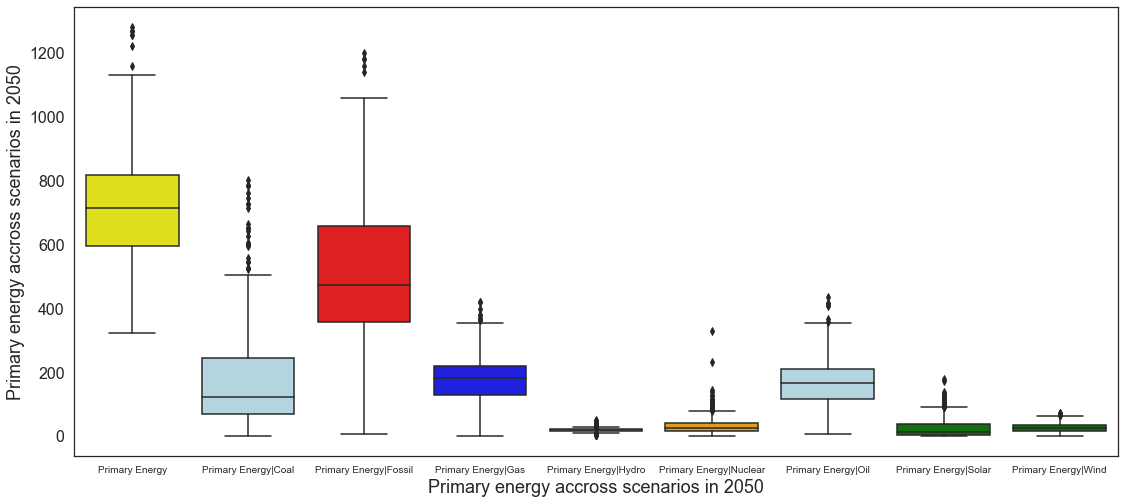

In [84]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(18.7,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='VARIABLE', y='2050', data=energy_ipcc, palette={'Primary Energy':'yellow', 'Primary Energy|Nuclear':'orange','Primary Energy|Oil':'lightblue', 'Primary Energy|Coal':'lightblue', 'Primary Energy|Gas':'blue', 'Primary Energy|Fossil':'red', 'Primary Energy|Hydro':'lightyellow', 'Primary Energy|Wind':'green', 'Primary Energy|Solar':'green'})
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)

plt.xlabel('Primary energy accross scenarios in 2050', size = 18)
plt.xticks(size = 10)


